## Data for one neuron
Here we are going to go through the basic features of **one** neuron.

We are going to:
- create a set of points (divided in 2 'clouds', _blue_ and _orange_ )
- display them in a graphical way
- set weight and bias for one neuron
- use the neuron, feeding it with the coordinates of a point, and see if it can tell if the point belongs to the _blue_ or _orange_ cloud.

In [5]:
import java.util.List;
import java.util.ArrayList;

public static class Point {
  private double x;
  private double y;
  
  public Point(double x, double y) {
    this.x = x;
    this.y = y;
  }
  
  public double getX() {
      return this.x;
  }
  public double getY() {
      return this.y;
  }
}

// Create random point lists
List<Point> orangeList = new ArrayList<>();
List<Point> blueList = new ArrayList<>();

final double RADIUS = 3;

int xOrangeCenter = -3;
int yOrangeCenter = -3;
for (int i=0; i<500; i++) { // Bottom left
  double rndAngle = Math.PI * 2 * Math.random();
  double x = xOrangeCenter + (Math.random() * RADIUS * Math.sin(rndAngle));
  double y = yOrangeCenter + (Math.random() * RADIUS * Math.cos(rndAngle));
  orangeList.add(new Point(x, y));
}

int xBlueCenter = 3;
int yBlueCenter = 3;
for (int i=0; i<500; i++) { // Top right
  double rndAngle = Math.PI * 2 * Math.random();
  double x = xBlueCenter + (Math.random() * RADIUS * Math.sin(rndAngle));
  double y = yBlueCenter + (Math.random() * RADIUS * Math.cos(rndAngle));
  blueList.add(new Point(x, y));
}
System.out.println("Created a dataset of 1000 points");

Created a dataset of 1000 points


In the previous step, we have created two clouds of points: 
- one centered at the bottom left (the orange ones)
- one centered at the top right (the blue ones)

Next, we draw a chart.

Added group two, blueSeries is org.knowm.xchart.XYSeries@23b73612null.


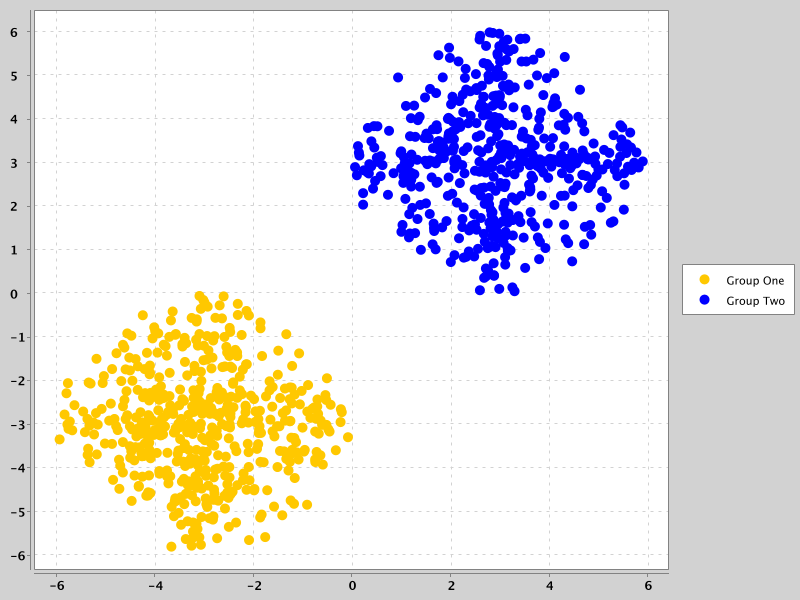

In [6]:
// Charts
// Doc and examples at https://knowm.org/open-source/xchart/xchart-example-code/

%maven org.knowm.xchart:xchart:3.5.4
import org.knowm.xchart.*;
import org.knowm.xchart.style.markers.SeriesMarkers;
import java.awt.Color;

// double[] xData = orangeList.stream()
//                     .mapToDouble(Point::getX)
//                     .toArray();
// double[] yData = orangeList.stream()
//                     .mapToDouble(Point::getY)
//                     .toArray();
XYChart chart = new XYChartBuilder().width(800).height(600).build();

// Customize Chart
chart.getStyler().setDefaultSeriesRenderStyle(XYSeries.XYSeriesRenderStyle.Scatter);
chart.getStyler().setChartTitleVisible(false);

chart.getStyler().setMarkerSize(10);

// Series, Orange
List<Double> xDataOrange = new LinkedList<>();
List<Double> yDataOrange = new LinkedList<>();

orangeList.stream().forEach(pt -> xDataOrange.add(pt.getX()));
orangeList.stream().forEach(pt -> yDataOrange.add(pt.getY()));

XYSeries orangeSeries = chart.addSeries("Group One", xDataOrange, yDataOrange);   
orangeSeries.setMarker(SeriesMarkers.CIRCLE);
orangeSeries.setMarkerColor(Color.ORANGE);
    
// Blue
List<Double> xDataBlue = new LinkedList<>();
List<Double> yDataBlue = new LinkedList<>();

blueList.stream().forEach(pt -> xDataBlue.add(pt.getX()));
blueList.stream().forEach(pt -> yDataBlue.add(pt.getY()));

XYSeries blueSeries = chart.addSeries("Group Two", xDataBlue, yDataBlue);   
System.out.println(String.format("Added group two, blueSeries is %snull.", blueSeries));
blueSeries.setMarker(SeriesMarkers.CIRCLE);
blueSeries.setMarkerColor(Color.BLUE);
    
// Render the chart
BitmapEncoder.getBufferedImage(chart);

In [7]:
/* 
 * One neuron with 2 entries: (x, y), with associated weights (w1 and w2)
 * and one bias and a final weight for the output.
 * Activation function is TanH
 * wFinal is the weight to apply to the final result, after applying the bias.
 * Then activation function is triggered, to have a result in [-1, +1]
 */
double w1 = -0.69, 
       w2 = -0.67, 
       wFinal = -2d;
double bias = 0.030;
private double neuron(double x1, double x2) {
  double y = wFinal * ((w1 * x1) + (w2 * x2) + bias);
  double result = Math.tanh(y);
  System.out.println(String.format("\tIn the neuron, output %f, becomes %f (after activation function)", y, result));
  return result;    
}
System.out.println("Neuron is ready to be used");

Neuron is ready to be used


- Try [this](http://localhost:8888/files/web/one.neuron.html), for an HTML version of a neuron (requires a Web Server to be running).

In [8]:
/*
 * We use the neuron, for a point (+3, +4).
 * y will be the output. y > 0 means blue, orange otherwise.
 */
double x1 = +3, x2 = +4;
double y = neuron(x1, x2);
System.out.println(String.format("x1: %.02f, x2: %.02f, y: %f => %s", x1, x2, y, y > 0 ? "blue" : "orange"));

	In the neuron, output 9.440000, becomes 1.000000 (after activation function)
x1: 3.00, x2: 4.00, y: 1.000000 => blue


In [9]:
/*
 * Another run, for point (-2, -3), that should be orange.
 */
double x1 = -2, x2 = -3;
double y = neuron(x1, x2);
System.out.println(String.format("x1: %.02f, x2: %.02f, y: %f => %s", x1, x2, y, y > 0 ? "blue" : "orange"));


	In the neuron, output -6.840000, becomes -0.999998 (after activation function)
x1: -2.00, x2: -3.00, y: -0.999998 => orange
